In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium 
!pip install plotly_express
!pip install pandasql

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,348 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [ ]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import pandasql
from pandasql import sqldf

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
!pip install squarify
import squarify
from wordcloud import WordCloud
import datetime

filePath = '/content/drive/MyDrive/Colab Notebooks/americanRestaurants.csv'
reviews = pd.read_csv(filePath)

print("Yelp Reviews of American Restaurants in Washington")
reviews.head()

Yelp Reviews of American Restaurants in Washington


business_id  ...                 date
0  g93Zs0YcG5B7Zcz_YWXXkA  ...  2017-12-17 04:22:13
1  g93Zs0YcG5B7Zcz_YWXXkA  ...  2017-02-10 02:10:56
2  g93Zs0YcG5B7Zcz_YWXXkA  ...  2018-02-25 05:06:00
3  g93Zs0YcG5B7Zcz_YWXXkA  ...  2017-11-07 21:21:45
4  g93Zs0YcG5B7Zcz_YWXXkA  ...  2017-06-21 01:35:36

[5 rows x 18 columns]

In [ ]:
filePath_2 = '/content/drive/MyDrive/Colab Notebooks/washingtonReviews (1).csv'
reviews_2 = pd.read_csv(filePath_2)

print("Yelp Reviews of American Restaurants in Washington")
reviews_2.head()

Yelp Reviews of American Restaurants in Washington


business_id  ...                 date
0  9c0TJ0m9Jq-PVyXUGzCT0A  ...  2018-06-19 21:25:59
1  9c0TJ0m9Jq-PVyXUGzCT0A  ...  2018-04-04 18:05:45
2  9c0TJ0m9Jq-PVyXUGzCT0A  ...  2018-05-30 18:09:05
3  9c0TJ0m9Jq-PVyXUGzCT0A  ...  2018-07-19 06:47:11
4  9c0TJ0m9Jq-PVyXUGzCT0A  ...  2018-04-06 16:20:00

[5 rows x 19 columns]

# EDA


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



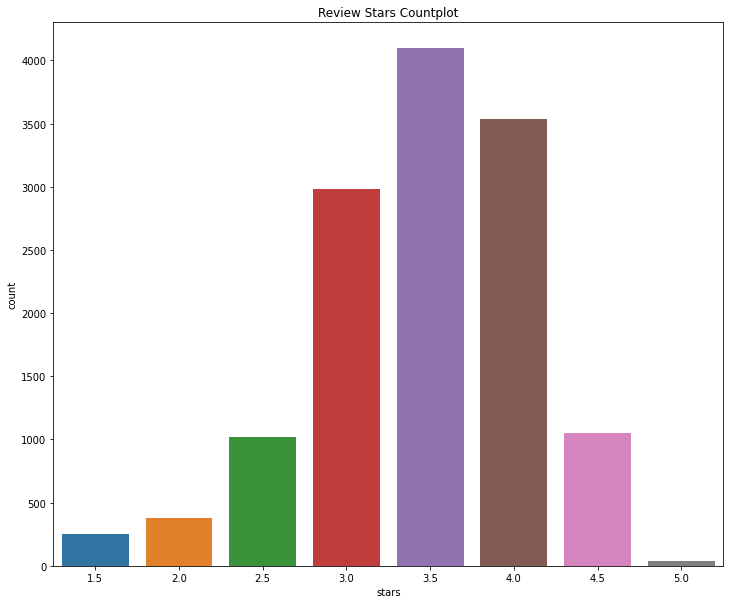

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(reviews['stars'], ax=ax)
plt.title('Review Stars Countplot')
plt.show()

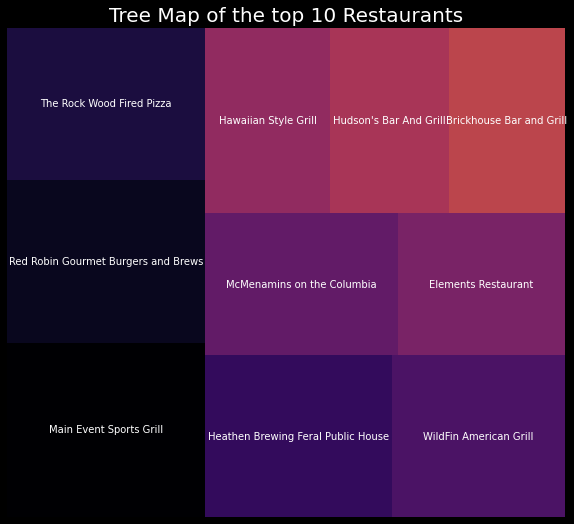

In [ ]:
y = reviews['name'].value_counts().head(10)
    
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('dark_background')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map of the top 10 Restaurants', fontsize = 20)

plt.axis('off')
plt.show()

In [ ]:
px.set_mapbox_access_token("pk.eyJ1Ijoib3NjYXI0MzIzIiwiYSI6ImNreDZ4OGt3NTI3NHEydXBuZjg3eW1rZTkifQ.CJR4HV-yRqFv3hH6VY2jEQ")
px.scatter_mapbox(reviews_2, lat="latitude", lon="longitude", color="stars", size='review_count' ,
                   size_max=30, zoom=3, width=1200, height=800)


In [ ]:

px.scatter_mapbox(reviews, lat="latitude", lon="longitude", color="stars", size='review_count' ,
                   size_max=15, zoom=10, width=1200, height=800)

# **Using K-Means Clustering**

By using K-Means clustering, all restaurants in the Map created of the state of WA, they will be put into clusters. The Location-Based recommendation algorithm will recommened the top 5 restaurants to the user based on the cluster.

In [ ]:
coords = reviews[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

# **The Elbow technique**

By Using the elbow technique, we can get a rough (yet acceptable) estimate of the best number of clusters to group the restaurants. In this case, the best number of clusters would be 5.

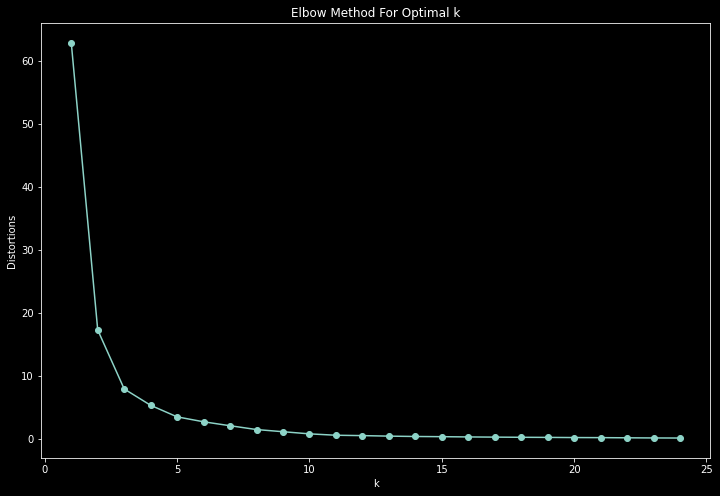

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
Washington = reviews
Washington['cluster'] = kmeans.predict(reviews[['longitude','latitude']])
Washington.head()

business_id               name  ...                 date cluster
0  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-12-17 04:22:13       3
1  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-02-10 02:10:56       3
2  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2018-02-25 05:06:00       3
3  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-11-07 21:21:45       3
4  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-06-21 01:35:36       3

[5 rows x 19 columns]

# **Print the Map of the clustered Restaurants**

# **Location Based Recommendation System: Applying the K-Means Clustering**

With this Location Based Recommendation System, the goal is to give a user the top 5 restaurants near him. However, the reason for using clustering is:

*   If we just created the recommendation System without clustering, the output of the top 5 restaurants would always be the same. Regardless of the user's location, it will output the best restaurant based on review count, and review stars. That could lead to the user having to travel really far away.
*   Using clustering, the system will predict which cluster best corresponds to the users location. Then given the users location (which now actually serves a purpose) will recommend the top 5 restaurants based on review count, review stars, AND the CLUSTER group the user belongs to. Thus, showing him the best ones closest to him.





In [ ]:
top_american = Washington

top_american.sort_values(by=['review_count', 'stars'], ascending=False)
top_american.head()

business_id               name  ...                 date cluster
0  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-12-17 04:22:13       3
1  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-02-10 02:10:56       3
2  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2018-02-25 05:06:00       3
3  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-11-07 21:21:45       3
4  g93Zs0YcG5B7Zcz_YWXXkA  99 Saloon & Grill  ...  2017-06-21 01:35:36       3

[5 rows x 19 columns]

In [ ]:
new_df = sqldf('SELECT DISTINCT(name), cluster, latitude, longitude , address, stars, review_count FROM top_american')
new_df.sort_values(by = ['cluster'], ascending = True)

name  cluster  ...  stars  review_count
53  Red Robin Gourmet Burgers and Brews        0  ...    3.0           131
72                       Sonic Drive-In        0  ...    3.0            68
24             TJ's Cascade Bar & Grill        0  ...    3.5            53
23                Shari's Cafe and Pies        0  ...    3.0            35
32           Hickory Restaurant and Bar        0  ...    4.5             6
..                                  ...      ...  ...    ...           ...
58                           Cafe Yumm!        4  ...    3.5            63
45                Shari's Cafe and Pies        4  ...    3.0            62
93         Charlie's Sports Bar & Grill        4  ...    3.0           122
78               Applebee's Grill + Bar        4  ...    2.5            79
25                          The Springs        4  ...    3.5            29

[95 rows x 7 columns]

In [ ]:
px.scatter_mapbox(Washington, lat="latitude", lon="longitude", color="cluster", size='review_count', 
                  hover_data= ['name', 'latitude', 'longitude'], zoom=10, width=1200, height=800)

In [ ]:

def recommend_traditional(df, longitude, latitude):
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
   #returns the best 5 restaurants in the cluster.
    return  df[df['cluster']== cluster].iloc[0:5][['name', 'longitude', 'latitude', 'stars', 'address'	]]

In [ ]:
recommend_traditional(new_df,45.62844, -122.6728)

0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



name  ...                      address
9        Popeyes Louisiana Kitchen  ...             120 SE 192nd Ave
16       McMenamins East Vancouver  ...  1900 NE 162nd Ave, Ste B107
19                        Otra Vez  ...   2115 SE 192nd Ave, Ste 112
20  Pacific House at Union Station  ...    315 NE 192nd Ave, Ste 301
23           Shari's Cafe and Pies  ...            2100 SE 164th Ave

[5 rows x 5 columns]